<a href="https://colab.research.google.com/github/vaishnavi-1/Electricity-theft-detection-using-ML/blob/main/final_6040_ETD_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

#Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data_final.csv')

In [ ]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [ ]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
33836    0
33837    0
33838    0
33839    0
33840    0
Name: OutPut, Length: 33841, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.120,9.96,16.92,7.60,24.324,18.05,24.324,18.750,17.840,14.920
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.500,9.99,11.78,18.59,24.180,18.57,14.590,12.820,19.370,15.920
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,15.636,10.37,15.32,13.51,12.230,14.68,15.636,15.636,15.636,15.636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.330,2.53,2.09,3.23,2.790,2.70,2.840,3.070,2.370,2.430
33837,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.480,17.20,10.86,9.01,13.240,8.52,7.710,7.360,6.960,7.880
33838,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.590,5.23,3.64,4.13,4.550,3.39,3.160,4.030,3.520,4.860
33839,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000


In [ ]:
x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


#Split the data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20304, 1034)
(20304,)
(13537, 1034)
(13537,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
clf.score(x_test,y_test)

0.8966536160153653

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12094
           1       0.53      0.26      0.34      1443

    accuracy                           0.90     13537
   macro avg       0.72      0.61      0.64     13537
weighted avg       0.88      0.90      0.88     13537



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8966536160153653

In [ ]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [ ]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  12138  out of  13537


In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 2}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

KNeighborsClassifier(n_neighbors=2)


In [ ]:

grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12094
           1       0.61      0.18      0.28      1443

    accuracy                           0.90     13537
   macro avg       0.76      0.58      0.61     13537
weighted avg       0.88      0.90      0.88     13537



In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
clf.score(x_test,y_test)

0.9001994533500776

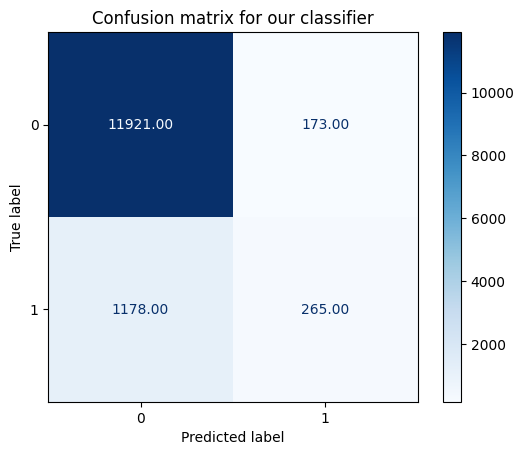

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion matrix for our classifier')
plt.show()


###ROC

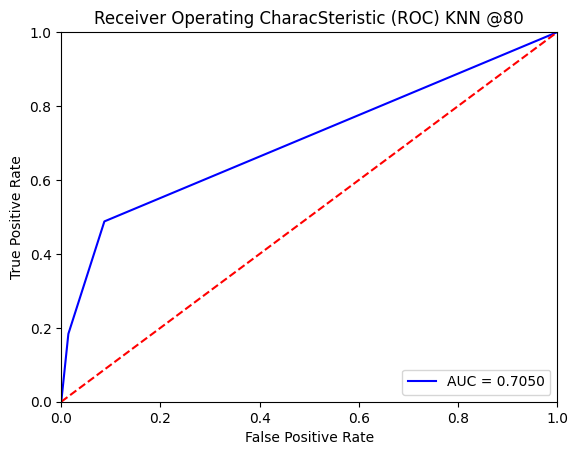

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating CharacSteristic (ROC) KNN @80')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()